In [52]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [22]:
df = pd.read_csv('../data/restaurant_data/reviews/batch1_reviews_dataset.csv')
df # google reviews dataframe


,place_id,name,review_id,rating,review_text,published_at,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB,5,Delicious delicious delicious! Had the Tom yum...,2 weeks ago,2024-08-15 00:17:31.766742,0,NaN,NaN,NaN,453.0,1210.0,True,NaN,NaN
1,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE,4,Fairly authentic Pad Thai cooked by a Thai per...,3 weeks ago,2024-08-08 00:17:31.769063,0,NaN,NaN,NaN,1381.0,8425.0,True,NaN,NaN
2,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB,5,I had the fried kway tiao which cost $6. If ha...,3 weeks ago,2024-08-08 00:17:31.771272,0,NaN,NaN,NaN,615.0,2361.0,True,NaN,NaN
3,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB,3,I got the prawn omelette rice here for $6. The...,a month ago,2024-07-29 00:17:31.773506,0,NaN,NaN,NaN,29.0,40.0,False,NaN,NaN
4,ChIJe3o1EBQZ2jERzAmaXpqhpAM,Bangkok Thai Food,ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE,5,Really tasty Thai place in chinatown! The gree...,2 months ago,2024-06-29 00:17:31.775457,0,NaN,NaN,NaN,38.0,12.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563791,ChIJfY11rSsZ2jERDwt2_4ZB6IE,Bangkok Jam @ Great World,ChdDSUhNMG9nS0VJQ0FnSUNDcFBuZGxnRRAB,5,Best Thai food in the city. Soups and fishes a...,4 years ago,2020-08-29 00:15:50.250671,0,NaN,NaN,NaN,2.0,NaN,False,NaN,NaN
563792,ChIJfY11rSsZ2jERDwt2_4ZB6IE,Bangkok Jam @ Great World,ChdDSUhNMG9nS0VJQ0FnSUNDcE43TXRRRRAB,5,Good food and quick service!,4 years ago,2020-08-29 00:15:50.253145,0,NaN,NaN,NaN,1.0,NaN,False,NaN,NaN
563793,ChIJfY11rSsZ2jERDwt2_4ZB6IE,Bangkok Jam @ Great World,ChZDSUhNMG9nS0VJQ0FnSUNDLU55Y1RREAE,5,I recommend the pad Thai and mango desert. So ...,4 years ago,2020-08-29 00:15:50.255494,0,NaN,NaN,NaN,7.0,9.0,False,NaN,NaN
563794,ChIJfY11rSsZ2jERDwt2_4ZB6IE,Bangkok Jam @ Great World,ChdDSUhNMG9nS0VJQ0FnSUNDNEx2U3Z3RRAB,5,Awesome dining experiences . Food is really de...,4 years ago,2020-08-29 00:15:50.257821,0,NaN,NaN,NaN,6.0,NaN,False,NaN,NaN


In [23]:
data = pd.read_csv('../data/restaurant_data/reviews/batch1_restaurants_dataset.csv')
data # list of shops


,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,['https://lh5.googleusercontent.com/p/AF1QipNq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419",https://www.google.com/maps/place/%2301-22+Wuf...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710",https://www.google.com/maps/place/116+PH%E1%BB...,['https://lh5.googleusercontent.com/p/AF1QipP1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ChIJLSQEyKwZ2jERsJYlxkDMr1g,123 ZÔ - Ẩm Thực Việt,252,Restaurant,['Restaurant'],4.4,"12 Gopeng St, #01-45, 49-51 icon village, Sing...",https://www.google.com/maps/place/123+Z%C3%94+...,['https://lh5.googleusercontent.com/p/AF1QipNM...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ChIJLTGN8D4Z2jERP4VNFXTnIpQ,123 Zô The Việt Kitchen,19,Vietnamese restaurant,['Vietnamese restaurant'],3.7,"18 Raffles Quay, #01-48 Lau Pa Sat, Singapore ...",https://www.google.com/maps/place/123+Z%C3%B4+...,['https://lh5.googleusercontent.com/p/AF1QipNI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,ChIJD1OQF_YX2jERS2ErVUoYUEQ,The Colony Solutions,0,Computer support and services,['Computer support and services'],0.0,"Excalibur Centre #04-11, 71 Ubi Cres, 408571",https://www.google.com/maps/place/The+Colony+S...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,ChIJI8jXMbgZ2jERtUeh_RK-b28,Colonial Club Signatures,279,Restaurant,['Restaurant'],3.8,"290 Orchard Rd, #B1-43, Singapore 238859",https://www.google.com/maps/place/Colonial+Clu...,['https://lh5.googleusercontent.com/p/AF1QipPN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1353,ChIJOdu7DbUZ2jERU4wDCM5Mhe8,The Honey Colony,9,Gourmet grocery store,['Gourmet grocery store'],3.9,"131 Tanglin Rd, #02-19, Singapore 247924",https://www.google.com/maps/place/The+Honey+Co...,['https://lh5.googleusercontent.com/p/AF1QipO6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1354,ChIJqbv38DoX2jERePtksDQYuM8,Columbus Coffee Co.,1299,Cafe,"['Cafe', 'Brunch restaurant', 'Coffee shop']",4.3,"220 Upper Thomson Rd, Singapore 574352",https://www.google.com/maps/place/Columbus+Cof...,['https://lh5.googleusercontent.com/p/AF1QipPZ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = data.drop(columns=['review_photos', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

data #drop unused columns

,place_id,name,reviews,main_category,categories,main_rating,address,link
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419",https://www.google.com/maps/place/%2301-22+Wuf...
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710",https://www.google.com/maps/place/116+PH%E1%BB...
3,ChIJLSQEyKwZ2jERsJYlxkDMr1g,123 ZÔ - Ẩm Thực Việt,252,Restaurant,['Restaurant'],4.4,"12 Gopeng St, #01-45, 49-51 icon village, Sing...",https://www.google.com/maps/place/123+Z%C3%94+...
4,ChIJLTGN8D4Z2jERP4VNFXTnIpQ,123 Zô The Việt Kitchen,19,Vietnamese restaurant,['Vietnamese restaurant'],3.7,"18 Raffles Quay, #01-48 Lau Pa Sat, Singapore ...",https://www.google.com/maps/place/123+Z%C3%B4+...
...,...,...,...,...,...,...,...,...
1351,ChIJD1OQF_YX2jERS2ErVUoYUEQ,The Colony Solutions,0,Computer support and services,['Computer support and services'],0.0,"Excalibur Centre #04-11, 71 Ubi Cres, 408571",https://www.google.com/maps/place/The+Colony+S...
1352,ChIJI8jXMbgZ2jERtUeh_RK-b28,Colonial Club Signatures,279,Restaurant,['Restaurant'],3.8,"290 Orchard Rd, #B1-43, Singapore 238859",https://www.google.com/maps/place/Colonial+Clu...
1353,ChIJOdu7DbUZ2jERU4wDCM5Mhe8,The Honey Colony,9,Gourmet grocery store,['Gourmet grocery store'],3.9,"131 Tanglin Rd, #02-19, Singapore 247924",https://www.google.com/maps/place/The+Honey+Co...
1354,ChIJqbv38DoX2jERePtksDQYuM8,Columbus Coffee Co.,1299,Cafe,"['Cafe', 'Brunch restaurant', 'Coffee shop']",4.3,"220 Upper Thomson Rd, Singapore 574352",https://www.google.com/maps/place/Columbus+Cof...


In [25]:
print(df.shape)
print(data.shape)


(563796, 16)
(1356, 8)


In [26]:
df.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True) #drop duplicates off respective data sets

print(df.shape) # no rows dropped for reviews
print(data.shape)

(563796, 16)
(1181, 8)


In [27]:
# Drop duplicates based on 'name', 'place_id', 'reviews', and 'address'
data.drop_duplicates(subset=['name', 'place_id', 'reviews', 'address'], inplace=True)
data.shape

(1134, 8)

In [28]:
cats_to_remove = ['Advertising agency', 'Art museum', 'Art studio', 'Association / Organization', 'Beauty salon',
                  'Bicycle club', 'Branding agency', 'Business management consultant', 'Candle store', 'Car dealer', 'Car wash', 'Caterer',
                  'Catering food and drink supplier', "Children's clothing store", 'Chinese Takeaway', 'Chinese language school', 'Clothing store',
                  'Coaching center', 'Coffee store', 'Condominium complex', 'Consultant', 'Corporate office', 'Curtain and upholstery cleaning service',
                  'Dance school', 'Delivery Restaurant', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center',
                  'Event management company', 'Fish store', 'Food producer', 'Food products supplier', 'Freight forwarding service', 'Fruit wholesaler'
                  'Gift shop', 'Gourmet grocery store', 'Gym and Fitness Centre', 'Hawker Stall', 'Hawker center', 'Health and beauty shop',
                  'Health food store', 'Holding company', 'Hotel', 'Housing development', 'Importer', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
                  'Information services', 'Interior designer', 'Italian grocery store', 'Japanese confectionery shop', 'Jewelry store', 'Lodging',
                  'Marketing agency', 'Marketing consultant', 'Maternity store', 'Motorcycle rental agency', 'Movie rental store', 'Music producer',
                  'Pastry shop', 'Performing arts group', 'Pet Shop', 'Photography service', 'Property management company', 'Publisher', 'Real estate consultant',
                  'Recording studio', 'Religious organization', 'Restaurant supply store', 'Serviced accommodation', 'Takeaways', 'Tattoo and piercing shop',
                  'Tattoo shop', 'Tea store', 'Used clothing store', 'Video production service', 'Wellness center', 'Wellness program', 'Wine cellar', "Women's clothing store"]

cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = data['main_category'].str.lower().isin(cats_to_remove)
data = data[~mask]
data

,place_id,name,reviews,main_category,categories,main_rating,address,link
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,(Fu Chan) Harummanis Muslim Food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...
1,ChIJuXEcL-gX2jEReUwbpfL8C4c,#01-22 Wufu Hakka Noodle,1,Noodle shop,['Noodle shop'],5.0,"590 Upper Thomson Rd, #01-22, Singapore 574419",https://www.google.com/maps/place/%2301-22+Wuf...
2,ChIJebVvXAAZ2jERRlzs4R2Qsm4,116 PHỐ ĐÊM,3,Vietnamese restaurant,['Vietnamese restaurant'],5.0,"116 Mackenzie Rd, Singapore 228710",https://www.google.com/maps/place/116+PH%E1%BB...
3,ChIJLSQEyKwZ2jERsJYlxkDMr1g,123 ZÔ - Ẩm Thực Việt,252,Restaurant,['Restaurant'],4.4,"12 Gopeng St, #01-45, 49-51 icon village, Sing...",https://www.google.com/maps/place/123+Z%C3%94+...
4,ChIJLTGN8D4Z2jERP4VNFXTnIpQ,123 Zô The Việt Kitchen,19,Vietnamese restaurant,['Vietnamese restaurant'],3.7,"18 Raffles Quay, #01-48 Lau Pa Sat, Singapore ...",https://www.google.com/maps/place/123+Z%C3%B4+...
...,...,...,...,...,...,...,...,...
1346,ChIJ9wXcrqkZ2jER2uM7Iul1CO4,Colony Bakery,35,Bakery,['Bakery'],4.1,"7 Raffles Ave., Singapore 039799",https://www.google.com/maps/place/Colony+Baker...
1348,ChIJKdihA68Z2jER07IZ_I3hEVI,Colony Capital Asia Pacific Pte Ltd,0,NaN,NaN,0.0,NaN,https://www.google.com/maps/place/Colony+Capit...
1349,ChIJ0eEWGp8Z2jERU0GVV6u922I,Dutch Colony Coffee Co.,382,Coffee shop,['Coffee shop'],4.2,"81 Clemenceau Ave, #01-21, Singapore 239917",https://www.google.com/maps/place/Dutch+Colony...
1351,ChIJD1OQF_YX2jERS2ErVUoYUEQ,The Colony Solutions,0,Computer support and services,['Computer support and services'],0.0,"Excalibur Centre #04-11, 71 Ubi Cres, 408571",https://www.google.com/maps/place/The+Colony+S...


In [29]:
# Replace NaN with 0 in both DataFrames
df.fillna(0, inplace=True)
data.fillna(0, inplace=True)

print(df.head())
print(data.head())

                      place_id               name  \
0  ChIJe3o1EBQZ2jERzAmaXpqhpAM  Bangkok Thai Food   
1  ChIJe3o1EBQZ2jERzAmaXpqhpAM  Bangkok Thai Food   
2  ChIJe3o1EBQZ2jERzAmaXpqhpAM  Bangkok Thai Food   
3  ChIJe3o1EBQZ2jERzAmaXpqhpAM  Bangkok Thai Food   
4  ChIJe3o1EBQZ2jERzAmaXpqhpAM  Bangkok Thai Food   

                              review_id  rating  \
0  ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB       5   
1   ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE       4   
2  ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB       5   
3  ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB       3   
4   ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE       5   

                                         review_text  published_at  \
0  Delicious delicious delicious! Had the Tom yum...   2 weeks ago   
1  Fairly authentic Pad Thai cooked by a Thai per...   3 weeks ago   
2  I had the fried kway tiao which cost $6. If ha...   3 weeks ago   
3  I got the prawn omelette rice here for $6. The...   a month ago   
4  Really tasty Thai pla

/tmp/ipykernel_163798/4069459751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


In [30]:
df['name'] = df['name'].str.lower() #convert all to lower case
data['name'] = data['name'].str.lower()

df['name'] = df['name'].str.strip() # strip white spaces
data['name'] = data['name'].str.strip()

df['name'] = df['name'].str.replace('[^\w\s]', '', regex=True) #remove special characters
data['name'] = data['name'].str.replace('[^\w\s]', '', regex=True)

print(df.head())
print(data.head())


/tmp/ipykernel_163798/2367895119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.lower()
/tmp/ipykernel_163798/2367895119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.strip()


                      place_id               name  \
0  ChIJe3o1EBQZ2jERzAmaXpqhpAM  bangkok thai food   
1  ChIJe3o1EBQZ2jERzAmaXpqhpAM  bangkok thai food   
2  ChIJe3o1EBQZ2jERzAmaXpqhpAM  bangkok thai food   
3  ChIJe3o1EBQZ2jERzAmaXpqhpAM  bangkok thai food   
4  ChIJe3o1EBQZ2jERzAmaXpqhpAM  bangkok thai food   

                              review_id  rating  \
0  ChdDSUhNMG9nS0VJQ0FnSUM3bE9DZ2lRRRAB       5   
1   ChZDSUhNMG9nS0VJQ0FnSURicHQyb2Z3EAE       4   
2  ChdDSUhNMG9nS0VJQ0FnSURieXYtTGdnRRAB       5   
3  ChdDSUhNMG9nS0VJQ0FnSUNiOFlhSzl3RRAB       3   
4   ChZDSUhNMG9nS0VJQ0FnSUN6NnJhZEp3EAE       5   

                                         review_text  published_at  \
0  Delicious delicious delicious! Had the Tom yum...   2 weeks ago   
1  Fairly authentic Pad Thai cooked by a Thai per...   3 weeks ago   
2  I had the fried kway tiao which cost $6. If ha...   3 weeks ago   
3  I got the prawn omelette rice here for $6. The...   a month ago   
4  Really tasty Thai pla

/tmp/ipykernel_163798/2367895119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace('[^\w\s]', '', regex=True)


In [31]:
# # Step 1: Group reviews by restaurant name and convert to dictionary
# reviews_dict = df.groupby('name')['review_text'].apply(lambda x: x.tolist()).to_dict()
# # Step 2: Merge reviews dictionary into shops DataFrame
# data['reviews'] = data['name'].map(reviews_dict)
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# data
# row_1 = data.iloc[0]  # iloc[0] selects the first row (index 0)
# print(row_1)

# print(data[data['name'] == 'bangkok thai food']['reviews'].values[0])


In [32]:
# Check for duplicates in 'place_id' column in 'data'
duplicates_in_data = data['place_id'].duplicated().sum()

print(duplicates_in_data)


0


In [33]:
# Remove duplicates from 'data'
data = data.drop_duplicates(subset='place_id')


print(data.shape)

(960, 8)


In [34]:
data = pd.merge(left=data, right=df, how='left', on='place_id')
data #merge data set


,place_id,name_x,reviews,main_category,categories,main_rating,address,link,name_y,review_id,...,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,fu chan harummanis muslim food,ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,...,2024-08-07 16:56:41.667109,0.0,0,0,0,8.0,103.0,True,0,0
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,fu chan harummanis muslim food,ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,...,2024-06-28 16:56:41.669325,0.0,0,0,0,10.0,0.0,True,0,0
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,fu chan harummanis muslim food,ChZDSUhNMG9nS0VJQ0FnSUNUeHF1NFN3EAE,...,2024-05-28 16:56:41.670805,0.0,0,0,0,196.0,1583.0,True,0,0
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,fu chan harummanis muslim food,ChZDSUhNMG9nS0VJQ0FnSURqeEpmOFhnEAE,...,2024-05-28 16:56:41.673009,0.0,0,0,0,11.0,1.0,False,0,0
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,['Malaysian restaurant'],2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,fu chan harummanis muslim food,ChdDSUhNMG9nS0VJQ0FnSUM5NjhtNGlnRRAB,...,2024-03-28 16:56:41.674813,0.0,0,0,0,6.0,0.0,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541812,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,comida mexicana singapore,ChdDSUhNMG9nS0VJQ0FnSUN3X2V5UG5nRRAB,...,2016-08-29 09:28:51.166243,0.0,0,0,0,224.0,180.0,True,0,0
541813,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,comida mexicana singapore,ChZDSUhNMG9nS0VJQ0FnSUN3c3ZLR1RREAE,...,2016-08-29 09:28:51.168764,0.0,0,0,0,306.0,285.0,True,0,0
541814,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,comida mexicana singapore,ChdDSUhNMG9nS0VJQ0FnSUNnNE9uSDl3RRAB,...,2015-08-29 09:28:51.171497,0.0,0,0,0,1013.0,2851.0,True,0,0
541815,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,['Restaurant'],4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,comida mexicana singapore,ChZDSUhNMG9nS0VJQ0FnSUN3b3FEUlRREAE,...,2013-08-29 09:28:51.540386,0.0,0,0,0,650.0,318.0,True,0,0


In [35]:
data = data.drop(['name_y', 'categories'], axis=1)
data #drop unnecessary columns

,place_id,name_x,reviews,main_category,main_rating,address,link,review_id,rating,review_text,...,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,5.0,Deserve a Michelin recognize food was memorizi...,...,2024-08-07 16:56:41.667109,0.0,0,0,0,8.0,103.0,True,0,0
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,1.0,0,...,2024-06-28 16:56:41.669325,0.0,0,0,0,10.0,0.0,True,0,0
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNUeHF1NFN3EAE,3.0,Ok. Decent food. A little ex.,...,2024-05-28 16:56:41.670805,0.0,0,0,0,196.0,1583.0,True,0,0
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSURqeEpmOFhnEAE,5.0,Here to celebrate my birthday. The food is so ...,...,2024-05-28 16:56:41.673009,0.0,0,0,0,11.0,1.0,False,0,0
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChdDSUhNMG9nS0VJQ0FnSUM5NjhtNGlnRRAB,1.0,This is not the first time I have missing food.,...,2024-03-28 16:56:41.674813,0.0,0,0,0,6.0,0.0,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541812,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUN3X2V5UG5nRRAB,3.0,So so food. The fajita meats are served on a h...,...,2016-08-29 09:28:51.166243,0.0,0,0,0,224.0,180.0,True,0,0
541813,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3c3ZLR1RREAE,4.0,slightly pricy but food is good. the Nacho pla...,...,2016-08-29 09:28:51.168764,0.0,0,0,0,306.0,285.0,True,0,0
541814,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUNnNE9uSDl3RRAB,1.0,More than half the restaurant was open but app...,...,2015-08-29 09:28:51.171497,0.0,0,0,0,1013.0,2851.0,True,0,0
541815,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3b3FEUlRREAE,5.0,Authentic Mexican cuisine in my opinion. Quite...,...,2013-08-29 09:28:51.540386,0.0,0,0,0,650.0,318.0,True,0,0


In [36]:
data.rename(columns={'name_x': 'name'}, inplace=True)


In [37]:
data

,place_id,name,reviews,main_category,main_rating,address,link,review_id,rating,review_text,...,published_at_date,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,5.0,Deserve a Michelin recognize food was memorizi...,...,2024-08-07 16:56:41.667109,0.0,0,0,0,8.0,103.0,True,0,0
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,1.0,0,...,2024-06-28 16:56:41.669325,0.0,0,0,0,10.0,0.0,True,0,0
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNUeHF1NFN3EAE,3.0,Ok. Decent food. A little ex.,...,2024-05-28 16:56:41.670805,0.0,0,0,0,196.0,1583.0,True,0,0
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSURqeEpmOFhnEAE,5.0,Here to celebrate my birthday. The food is so ...,...,2024-05-28 16:56:41.673009,0.0,0,0,0,11.0,1.0,False,0,0
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChdDSUhNMG9nS0VJQ0FnSUM5NjhtNGlnRRAB,1.0,This is not the first time I have missing food.,...,2024-03-28 16:56:41.674813,0.0,0,0,0,6.0,0.0,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541812,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUN3X2V5UG5nRRAB,3.0,So so food. The fajita meats are served on a h...,...,2016-08-29 09:28:51.166243,0.0,0,0,0,224.0,180.0,True,0,0
541813,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3c3ZLR1RREAE,4.0,slightly pricy but food is good. the Nacho pla...,...,2016-08-29 09:28:51.168764,0.0,0,0,0,306.0,285.0,True,0,0
541814,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUNnNE9uSDl3RRAB,1.0,More than half the restaurant was open but app...,...,2015-08-29 09:28:51.171497,0.0,0,0,0,1013.0,2851.0,True,0,0
541815,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3b3FEUlRREAE,5.0,Authentic Mexican cuisine in my opinion. Quite...,...,2013-08-29 09:28:51.540386,0.0,0,0,0,650.0,318.0,True,0,0


## Tokenization Pipeline


In [38]:
data['review_text'] = data['review_text'].fillna('0')


In [39]:
# Check data types
print(data['review_text'].apply(type).value_counts())

# Handle non-string values
data['review_text'] = data['review_text'].astype(str)

<class 'str'>    369048
<class 'int'>    172769
Name: review_text, dtype: int64


In [40]:
non_string_rows = data[~data['review_text'].apply(lambda x: isinstance(x, str))]

print("Rows with non-string values:")
print(non_string_rows)


Rows with non-string values:
Empty DataFrame
Columns: [place_id, name, reviews, main_category, main_rating, address, link, review_id, rating, review_text, published_at, published_at_date, review_likes_count, response_from_owner_text, response_from_owner_ago, response_from_owner_date, total_number_of_reviews_by_reviewer, total_number_of_photos_by_reviewer, is_local_guide, review_translated_text, response_from_owner_translated_text]
Index: []

[0 rows x 21 columns]


In [41]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_review(review):
    if pd.isnull(review):
        return []
    tokens = nltk.word_tokenize(review) #tokenize word
    tokens = [word.lower() for word in tokens if word.isalpha()] #lower str words
    tokens = [word for word in tokens if word not in stop_words] # stop words, remove useless words
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # strip words to basic word
    return tokens

# Apply preprocessing
data['tokenized_reviews'] = data['review_text'].apply(preprocess_review)


[nltk_data] Downloading package punkt to /home/ronaldlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ronaldlin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ronaldlin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ronaldlin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
data

,place_id,name,reviews,main_category,main_rating,address,link,review_id,rating,review_text,...,review_likes_count,response_from_owner_text,response_from_owner_ago,response_from_owner_date,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text,tokenized_reviews
0,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNiN19fZ0RBEAE,5.0,Deserve a Michelin recognize food was memorizi...,...,0.0,0,0,0,8.0,103.0,True,0,0,"[deserve, michelin, recognize, food, memorizin..."
1,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUQ5d1AtTEp3EAE,1.0,0,...,0.0,0,0,0,10.0,0.0,True,0,0,[]
2,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSUNUeHF1NFN3EAE,3.0,Ok. Decent food. A little ex.,...,0.0,0,0,0,196.0,1583.0,True,0,0,"[ok, decent, food, little, ex]"
3,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChZDSUhNMG9nS0VJQ0FnSURqeEpmOFhnEAE,5.0,Here to celebrate my birthday. The food is so ...,...,0.0,0,0,0,11.0,1.0,False,0,0,"[celebrate, birthday, food, unique, really, re..."
4,ChIJ8Y3ZDL8R2jERZdF0_9U5XSo,fu chan harummanis muslim food,35,Malaysian restaurant,2.1,"145 Teck Whye Ln, Singapore 680145",https://www.google.com/maps/place/(Fu+Chan)+Ha...,ChdDSUhNMG9nS0VJQ0FnSUM5NjhtNGlnRRAB,1.0,This is not the first time I have missing food.,...,0.0,0,0,0,6.0,0.0,True,0,0,"[first, time, missing, food]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541812,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUN3X2V5UG5nRRAB,3.0,So so food. The fajita meats are served on a h...,...,0.0,0,0,0,224.0,180.0,True,0,0,"[food, fajita, meat, served, hot, plate, caref..."
541813,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3c3ZLR1RREAE,4.0,slightly pricy but food is good. the Nacho pla...,...,0.0,0,0,0,306.0,285.0,True,0,0,"[slightly, pricy, food, good, nacho, platter, ..."
541814,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChdDSUhNMG9nS0VJQ0FnSUNnNE9uSDl3RRAB,1.0,More than half the restaurant was open but app...,...,0.0,0,0,0,1013.0,2851.0,True,0,0,"[half, restaurant, open, apparently, reserved,..."
541815,ChIJF3ZI5goY2jERbAEUpy98dwA,comida mexicana singapore,572,Restaurant,4.6,"404 E Coast Rd, Singapore 428998",https://www.google.com/maps/place/Comida+Mexic...,ChZDSUhNMG9nS0VJQ0FnSUN3b3FEUlRREAE,5.0,Authentic Mexican cuisine in my opinion. Quite...,...,0.0,0,0,0,650.0,318.0,True,0,0,"[authentic, mexican, cuisine, opinion, quite, ..."


### Text Analysis

  1. Sentiment Analysis
  Purpose: Sentiment analysis is used to determine the emotional tone behind a body of text. This can help in understanding opinions, sentiments, and feelings expressed in the text. 
  2. Frequency Analysis
  Purpose: Frequency analysis involves counting the occurrences of words or phrases in a text corpus. This helps in understanding the most common terms and can be used for various applications like keyword extraction and content summarization.
  3. Topic Modeling
  Purpose: Topic modeling is used to identify themes or topics within a large corpus of text. It helps in discovering the underlying structure and topics present in the data.
  4. Creating Word Clouds
  Purpose: Word clouds are visual representations of word frequency in a text corpus. Words that appear more frequently are displayed more prominently.

Sentiment Analysis : using TextBlob

In [46]:
# Apply sentiment analysis to each review
data['review_sentiment'] = data['tokenized_reviews'].apply(lambda reviews: [TextBlob(review).sentiment.polarity for review in reviews])

# Calculate average sentiment for each shop
data['average_sentiment'] = data['review_sentiment'].apply(lambda sentiments: sum(sentiments) / len(sentiments) if sentiments else None)

print(data[['name', 'average_sentiment']])





"""The average_sentiment reflects the overall sentiment of the reviews for each shop, based on the sentiment polarity scores provided by TextBlob. Sentiment polarity ranges from -1 to 1:

-1: Very negative sentiment
0: Neutral sentiment
1: Very positive sentiment
Here’s how to interpret the average_sentiment scores based on the range:

Positive Scores (e.g., 0.012500 to 0.095833): These values indicate a generally positive sentiment in the reviews. The higher the score, the more positive the sentiment. For example, an average sentiment of 0.075817 suggests that, on average, the reviews are slightly positive.

NaN Values: These indicate that there were no reviews or sentiment scores available for that shop. NaN stands for "Not a Number" and generally appears when there's missing or incomplete data.

Specific Interpretation of Your Data:

0.046667: Slightly positive sentiment.
NaN: No sentiment data available.
0.095833: Slightly more positive sentiment compared to 0.046667.
0.075817: Positive sentiment, slightly higher than 0.046667.
0.012500: Very mildly positive sentiment.
Overall, these scores suggest that the reviews for the shop are generally positive, but the differences between the scores are relatively small. If you want a more detailed analysis, you could consider additional metrics or more sophisticated sentiment analysis tools.
"""


                                  name  average_sentiment
0       fu chan harummanis muslim food           0.046667
1       fu chan harummanis muslim food                NaN
2       fu chan harummanis muslim food           0.095833
3       fu chan harummanis muslim food           0.075817
4       fu chan harummanis muslim food           0.012500
...                                ...                ...
541812       comida mexicana singapore           0.063333
541813       comida mexicana singapore           0.066667
541814       comida mexicana singapore          -0.014583
541815       comida mexicana singapore           0.157143
541816       comida mexicana singapore           0.066667

[541817 rows x 2 columns]


'The average_sentiment reflects the overall sentiment of the reviews for each shop, based on the sentiment polarity scores provided by TextBlob. Sentiment polarity ranges from -1 to 1:\n\n-1: Very negative sentiment\n0: Neutral sentiment\n1: Very positive sentiment\nHere’s how to interpret the average_sentiment scores based on the range:\n\nPositive Scores (e.g., 0.012500 to 0.095833): These values indicate a generally positive sentiment in the reviews. The higher the score, the more positive the sentiment. For example, an average sentiment of 0.075817 suggests that, on average, the reviews are slightly positive.\n\nNaN Values: These indicate that there were no reviews or sentiment scores available for that shop. NaN stands for "Not a Number" and generally appears when there\'s missing or incomplete data.\n\nSpecific Interpretation of Your Data:\n\n0.046667: Slightly positive sentiment.\nNaN: No sentiment data available.\n0.095833: Slightly more positive sentiment compared to 0.046667.

/tmp/ipykernel_163798/2527313848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_sentiment', y='name', data=sorted_data, palette='viridis')
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22346 (\N{CJK UNIFIED IDEOGRAPH-574A}) missing from font

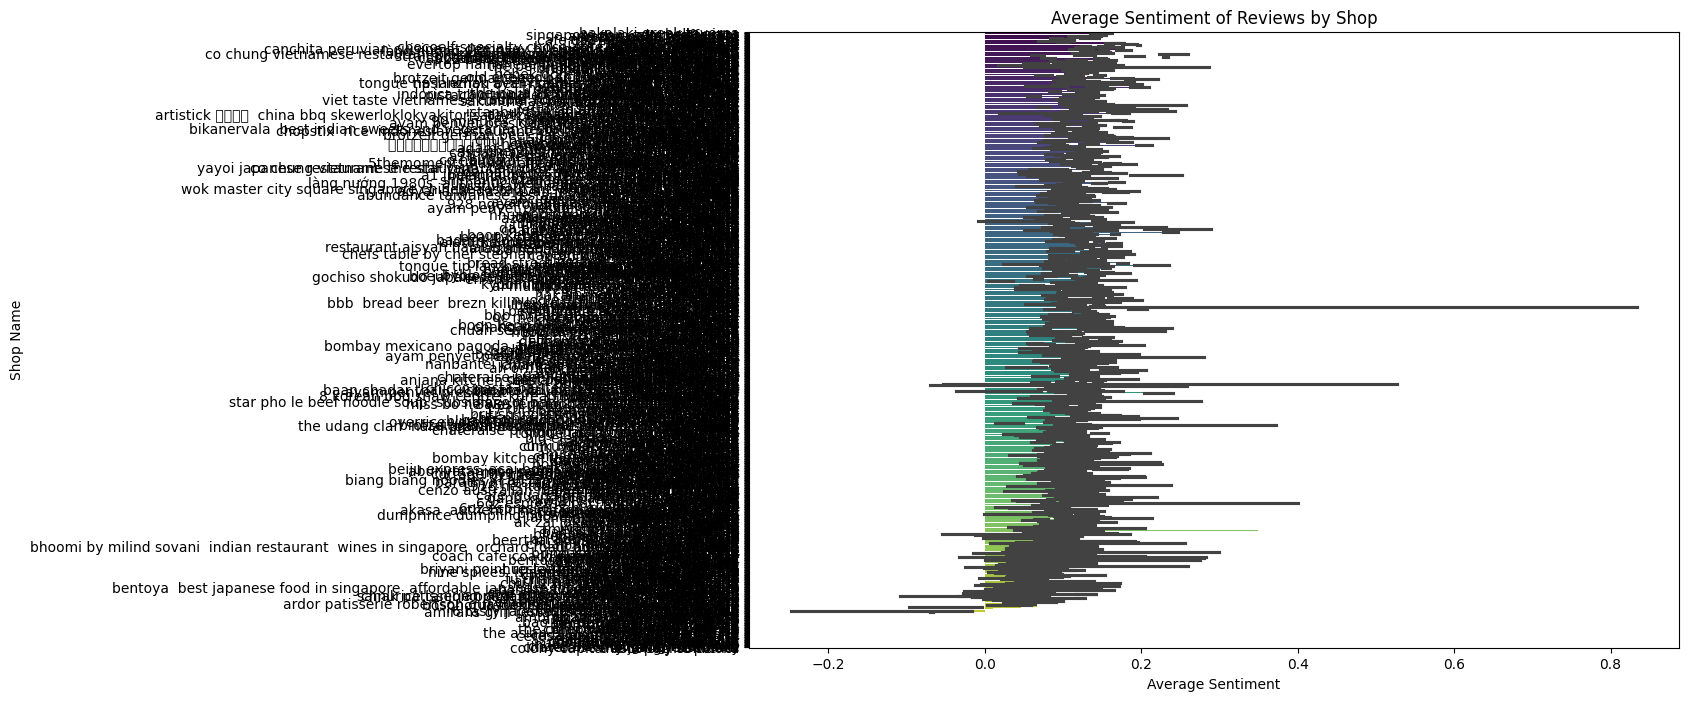

In [45]:
# Sort data by average sentiment for better visualization
sorted_data = data[['name', 'average_sentiment']].sort_values(by='average_sentiment', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='average_sentiment', y='name', data=sorted_data, palette='viridis')

# Add labels and title
plt.xlabel('Average Sentiment')
plt.ylabel('Shop Name')
plt.title('Average Sentiment of Reviews by Shop')

# Show the plot
plt.show()

Sentiment Analysis: Using VADER

In [54]:
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def vader_sentiment(review):
    return sia.polarity_scores(review)['compound']

data['sentiments'] = data['tokenized_reviews'].apply(lambda reviews: [vader_sentiment(review) for review in reviews])
data['vader_average_sentiment'] = data['sentiments'].apply(lambda sentiments: sum(sentiments) / len(sentiments) if sentiments else None)
data['vader_average_sentiment']

"""Understanding the compound Score:
Range: The compound score ranges from -1 to 1:

-1: Very negative sentiment
0: Neutral sentiment
1: Very positive sentiment
Calculation: The compound score is calculated by summing the valence scores of each word in the text, adjusting for the intensity of the sentiment, and then normalizing the result. The compound score provides an overall measure of sentiment in a single value.

Usefulness: The compound score is useful for getting a quick, overall assessment of sentiment. It is particularly effective for summarizing the sentiment of longer texts, such as reviews, by combining various sentiment scores into a single metric."""

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ronaldlin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


'Understanding the compound Score:\nRange: The compound score ranges from -1 to 1:\n\n-1: Very negative sentiment\n0: Neutral sentiment\n1: Very positive sentiment\nCalculation: The compound score is calculated by summing the valence scores of each word in the text, adjusting for the intensity of the sentiment, and then normalizing the result. The compound score provides an overall measure of sentiment in a single value.\n\nUsefulness: The compound score is useful for getting a quick, overall assessment of sentiment. It is particularly effective for summarizing the sentiment of longer texts, such as reviews, by combining various sentiment scores into a single metric.'

In [55]:
data['vader_average_sentiment']

0         0.086367
1              NaN
2         0.059200
3         0.088239
4        -0.074000
            ...   
541812    0.051867
541813    0.055050
541814    0.000000
541815    0.060214
541816    0.055050
Name: vader_average_sentiment, Length: 541817, dtype: float64

/tmp/ipykernel_163798/2130611254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_sentiment', y='name', data=sorted_shops, palette='coolwarm')
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ronaldlin/.pyenv/versions/3.10.6/envs/yumspeakenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22346 (\N{CJK UNIFIED IDEOGRAPH-574A}) missing from fo

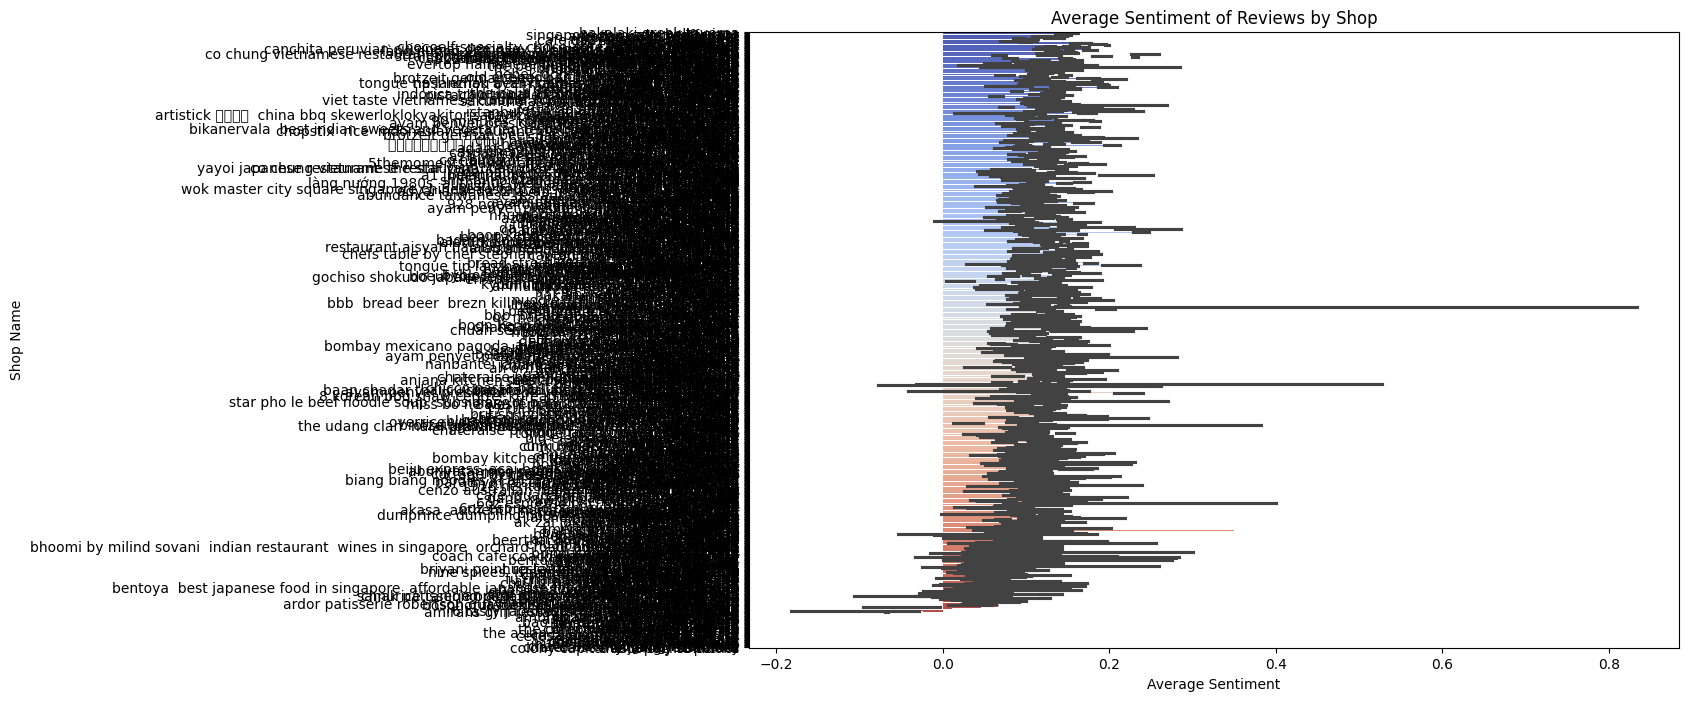

In [56]:
# Sort DataFrame by average sentiment for better visualization
sorted_shops = data[['name', 'average_sentiment']].sort_values(by='average_sentiment', ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='average_sentiment', y='name', data=sorted_shops, palette='coolwarm')

# Add labels and title
plt.xlabel('Average Sentiment')
plt.ylabel('Shop Name')
plt.title('Average Sentiment of Reviews by Shop')

# Show the plot
plt.show()


Frequency Analysis

In [49]:
# Assuming tokenized_reviews is a list of lists where each inner list is a list of tokens
# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in data['tokenized_reviews'] for token in sublist]

# Count word frequencies
frequency = Counter(all_tokens)

# Print word frequencies
print(frequency)


Counter({'food': 223605, 'good': 140813, 'service': 112955, 'great': 81858, 'nice': 65586, 'place': 65534, 'staff': 61340, 'restaurant': 44620, 'delicious': 41565, 'time': 41119, 'friendly': 39939, 'really': 38917, 'dish': 35808, 'taste': 34065, 'like': 32118, 'price': 31963, 'one': 31760, 'u': 31707, 'chicken': 31616, 'back': 29630, 'also': 29402, 'experience': 28430, 'come': 28291, 'best': 28064, 'well': 27658, 'try': 27042, 'would': 25389, 'ordered': 24308, 'love': 24093, 'definitely': 23779, 'order': 23230, 'rice': 21962, 'excellent': 21785, 'amazing': 21686, 'beef': 20554, 'recommend': 20336, 'ambience': 19826, 'even': 19449, 'menu': 18622, 'portion': 18594, 'go': 18244, 'table': 18120, 'drink': 17893, 'quite': 17600, 'quality': 17591, 'get': 17335, 'meat': 17084, 'meal': 16809, 'singapore': 16690, 'served': 16336, 'came': 15913, 'tasty': 15827, 'dessert': 15620, 'fresh': 15492, 'friend': 15188, 'option': 15149, 'worth': 15035, 'lunch': 14856, 'pork': 14762, 'cake': 14477, 'custom

/tmp/ipykernel_163798/2920360377.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')


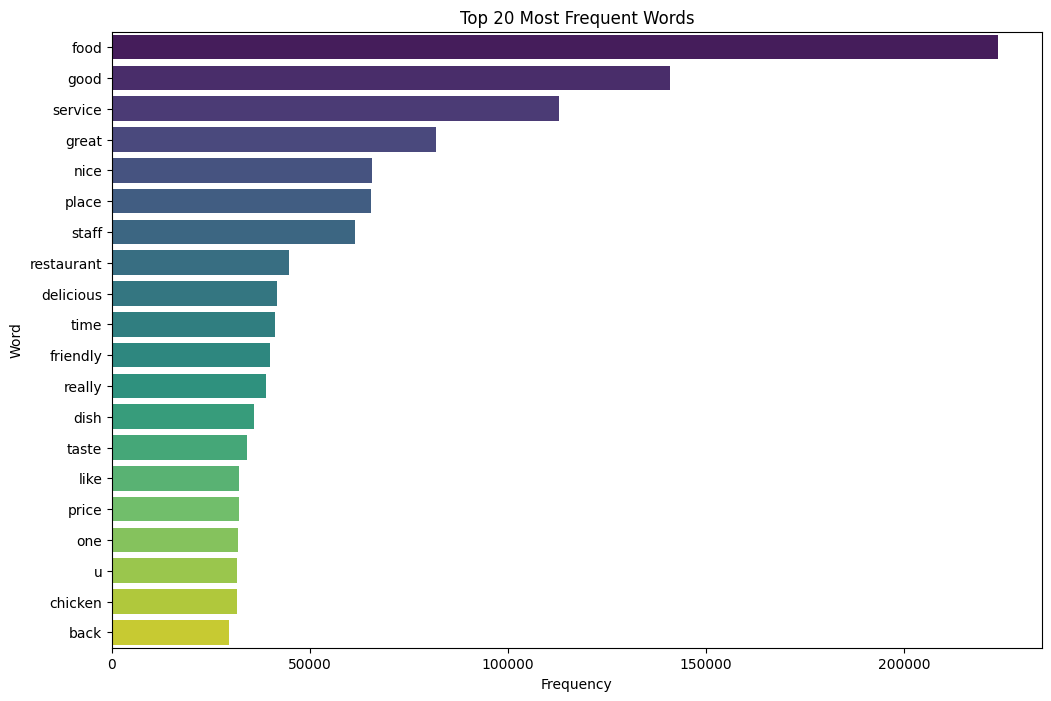

In [50]:
# Assuming `frequency` is the Counter object from the previous code
# Convert the Counter object to a DataFrame for easier plotting
frequency_df = pd.DataFrame(frequency.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Limit the number of words to plot (e.g., top 20 words)
top_words = frequency_df.head(20)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words')

# Show the plot
plt.show()


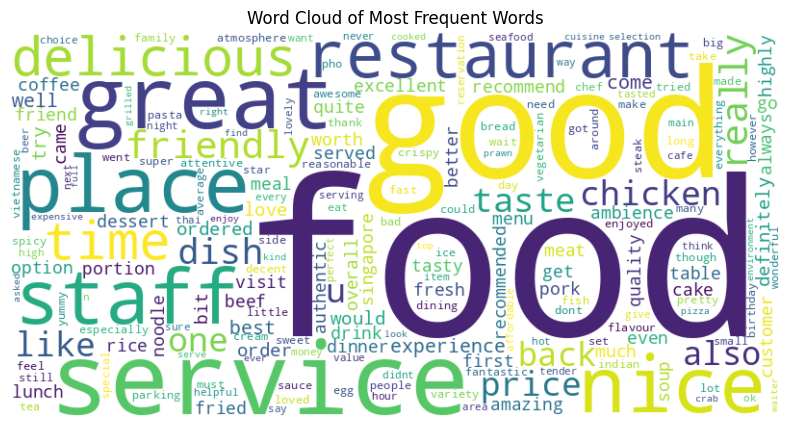

In [51]:
# Convert the Counter object to a dictionary for WordCloud
word_freq = dict(frequency)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Most Frequent Words')
plt.show()